## mPharmaHealth Twitter Sentiment Analysis
#### INTRODUCTION
A sentiment analysis project on a healthcare startup [mPharmaHealth](https://mpharma.com/)                                  
mPharmaHealth is a Ghanaian healthcare startup founded in 2013 to improve patients’ access to medication and medical care.
It works with a network of pharmacies across Africa to reduce prices and offers a payment scheme called Mutti, which allows patents to pay in installments using a mobile money wallet.

##### About Analysis
I scraped about 1300 tweets between the years 2014 - 2023.

##### Some questions to be explored are:
1. Location of tweeters
2. Tweet Trends across the years
3. Sentiment scores of tweets
4. Top tweeters
5. Frequent words in tweets

In [44]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import snscrape.modules.twitter as smt
import datetime as dt
import re 
import emoji
import unicodedata
from wordcloud import WordCloud



pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Data Gathering

In [11]:
search_words = '@mPharmaHealth OR #mpharmamutti OR @mpharmamutti' 
search_query =search_words + '-filter:retweets -filter:replies -place:"Mumbai" -has:media lang:en'
scraper = smt.TwitterSearchScraper(search_query)

tweets = []
num_tweets = 2_000

for i,tweet in tqdm(enumerate(scraper.get_items())):
    
    data = [
        tweet.date,
        tweet.id,  
        tweet.user.username,
        tweet.rawContent,
        tweet.likeCount,
        tweet.retweetCount,
        tweet.user.location
    ]
    tweets.append(data)
    if i >  num_tweets:
        break

0it [00:00, ?it/s]

In [12]:
df = pd.DataFrame(tweets,columns = ['date','id','username','content','like_count','retweet_count','location'])
df.head(10)

,date,id,username,content,like_count,retweet_count,location
0,2023-02-25 08:02:38+00:00,1629391405134012416,AppolonaAdeyemi,mPharma launches mobile POS to enhance retail ...,0,0,
1,2023-02-23 16:39:26+00:00,1628796687396532224,DRF_India,Medical expenses push millions into poverty. P...,2,1,Hyderabad
2,2023-02-20 11:54:51+00:00,1627637904829779970,PaulDamalie,"Pretty excited for my sister , she's studying ...",1,0,ACC/ LON
3,2023-02-19 19:58:58+00:00,1627397351449952257,AlsoliCinzia,"Greetings @mPharmaHealth, pls support #SaveSoi...",22,10,Legnano -MI- Italia
4,2023-02-18 09:06:18+00:00,1626870712203087874,SaveSoilSourav,Greetings @mPharmaHealth \nMr Tseke Nkadimeng ...,30,21,India
5,2023-02-17 14:48:29+00:00,1626594439895580672,PythonAccra,Join us as we kick-off our #PyChat series with...,44,26,"Accra, Ghana"
6,2023-02-16 18:30:55+00:00,1626288026082238464,Dr_nuellie_,I’ve found that sometimes patients find it dif...,5,3,Ghana
7,2023-02-15 20:37:00+00:00,1625957371871723543,Dr_nuellie_,Have you visited @mpharmamutti's website? They...,7,5,Ghana
8,2023-02-15 16:04:28+00:00,1625888784851128321,mamiyaa,My first CPD!!! \nI’ll be sharing a bit from o...,31,19,
9,2023-02-14 12:25:34+00:00,1625471307285426177,Dr_nuellie_,It’s Val’s Day &amp; I’m sure some of us have ...,3,4,Ghana


In [13]:
df.tail()

,date,id,username,content,like_count,retweet_count,location
1380,2015-08-04 21:14:42+00:00,628675449682546688,mmanongwa,See how @mPharmaHealth is changing the #health...,2,0,"Kigali, Rwanda"
1381,2015-08-04 14:21:56+00:00,628571574350794753,tinacornely,#Tech Revolution In #Africa WillBeWireless. Br...,0,1,"Miami, Florida"
1382,2014-10-15 15:33:18+00:00,522409892296941568,EvoleroTalk,"Amazing! ""@OrangeFabIL: #greatentrepreneurs #s...",1,0,Tel Aviv
1383,2014-08-14 15:37:21+00:00,499942863216865280,lynnvos,"Welcome! Join us @WPPStreamHealth ,@getqardio...",0,0,New York City
1384,2014-06-16 19:39:15+00:00,478622853030367232,mPharmaHealth,"Heads up, our new Handle is @mPharmaHealth !",1,0,Africa


In [14]:
#save the data to my computer so I don't have to re-run the webscraper for best practice
df.to_csv('mpharma_twitter_engagement.csv', index = False)

### Data Cleaning 

In [147]:
#read in our data

df = pd.read_csv('mpharma_twitter_engagement.csv')
df.head()

,date,id,username,content,like_count,retweet_count,location
0,2023-02-25 08:02:38+00:00,1629391405134012416,AppolonaAdeyemi,mPharma launches mobile POS to enhance retail ...,0,0,NaN
1,2023-02-23 16:39:26+00:00,1628796687396532224,DRF_India,Medical expenses push millions into poverty. P...,2,1,Hyderabad
2,2023-02-20 11:54:51+00:00,1627637904829779970,PaulDamalie,"Pretty excited for my sister , she's studying ...",1,0,ACC/ LON
3,2023-02-19 19:58:58+00:00,1627397351449952257,AlsoliCinzia,"Greetings @mPharmaHealth, pls support #SaveSoi...",22,10,Legnano -MI- Italia
4,2023-02-18 09:06:18+00:00,1626870712203087874,SaveSoilSourav,Greetings @mPharmaHealth \nMr Tseke Nkadimeng ...,30,21,India


In [148]:
#view random sampled data
df.sample(5)

,date,id,username,content,like_count,retweet_count,location
1329,2016-10-10 18:48:10+00:00,785552521301483520,TwittAurora,Our big idea for the @worldhealthsmt @mPharmaH...,0,0,Planet Earth
37,2022-11-01 20:57:31+00:00,1587549420874260480,selasieanani,"Last week, we had the privilege of having 5 am...",5,5,Ghana
707,2021-02-12 09:25:59+00:00,1360158195726041088,Therealwyno,We are giving everyone the opportunity to acce...,2,3,Roman Hill
723,2021-02-12 00:31:54+00:00,1360023790571446273,InnovaConnectGh,I had two people calling to find out if @mphar...,5,7,"Accra, Ghana"
505,2021-03-13 06:20:14+00:00,1370620701552607233,jerryngb1,"Let's create this Awareness fam,Health ankasa ...",6,9,UK


In [149]:
#Check for urls and emojis in tweets
df['content'][11:18]

11    MBA case study: fixing pharma in Gabon https:/...
12    The pandemic taught us countless lessons about...
13    #African #AfricanAmericanStudies\n#startups #s...
14    In Africa, Asia &amp; Latin America there is a...
15    Affordable healthcare is a fundamental aspect ...
16    mPharma - Rwanda is seeking to recruit a SENIO...
17    💡 Sometimes in Africa, you have to run twice a...
Name: content, dtype: object

In [150]:
#Top ten locations of tweets
df['location'].value_counts()[:10]

Accra, Ghana            118
Ghana                    80
Palo Alto                53
Africa                   45
Lagos, Nigeria           43
Greater Accra, Ghana     32
Nairobi, Kenya           30
kumasi                   29
Nairobi                  24
Washington, DC           18
Name: location, dtype: int64

In [151]:
#preview the location column
df['location'][11:20] #These emojis and special characters will be removed

11              New York, USA
12               New York, NY
13                      Ghana
14             Washington, DC
15               New York, NY
16       info@jobinrwanda.com
17    🟩🟩🟩🟨⬜ 10K subscribers ➜
18                  Palo Alto
19                        NaN
Name: location, dtype: object

In [152]:
#filter out tweets by the user of interest. These users are connected to the subject of analysis
final_df = df[~df['username'].isin (['mPharmaHealth','mpharmamutti','Rockson2'])].reset_index(drop = True)
final_df.head()

,date,id,username,content,like_count,retweet_count,location
0,2023-02-25 08:02:38+00:00,1629391405134012416,AppolonaAdeyemi,mPharma launches mobile POS to enhance retail ...,0,0,NaN
1,2023-02-23 16:39:26+00:00,1628796687396532224,DRF_India,Medical expenses push millions into poverty. P...,2,1,Hyderabad
2,2023-02-20 11:54:51+00:00,1627637904829779970,PaulDamalie,"Pretty excited for my sister , she's studying ...",1,0,ACC/ LON
3,2023-02-19 19:58:58+00:00,1627397351449952257,AlsoliCinzia,"Greetings @mPharmaHealth, pls support #SaveSoi...",22,10,Legnano -MI- Italia
4,2023-02-18 09:06:18+00:00,1626870712203087874,SaveSoilSourav,Greetings @mPharmaHealth \nMr Tseke Nkadimeng ...,30,21,India


In [153]:
#view last five rows of data

final_df.tail()

,date,id,username,content,like_count,retweet_count,location
1314,2015-08-06 11:52:24+00:00,629258718027337728,dawnadenton,African Dawn is out! http://t.co/U0Qwv2HZdQ St...,0,1,"Somerset, UK"
1315,2015-08-04 21:14:42+00:00,628675449682546688,mmanongwa,See how @mPharmaHealth is changing the #health...,2,0,"Kigali, Rwanda"
1316,2015-08-04 14:21:56+00:00,628571574350794753,tinacornely,#Tech Revolution In #Africa WillBeWireless. Br...,0,1,"Miami, Florida"
1317,2014-10-15 15:33:18+00:00,522409892296941568,EvoleroTalk,"Amazing! ""@OrangeFabIL: #greatentrepreneurs #s...",1,0,Tel Aviv
1318,2014-08-14 15:37:21+00:00,499942863216865280,lynnvos,"Welcome! Join us @WPPStreamHealth ,@getqardio...",0,0,New York City


In [154]:
#check null values and data types

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           1319 non-null   object
 1   id             1319 non-null   int64 
 2   username       1319 non-null   object
 3   content        1319 non-null   object
 4   like_count     1319 non-null   int64 
 5   retweet_count  1319 non-null   int64 
 6   location       1087 non-null   object
dtypes: int64(3), object(4)
memory usage: 72.3+ KB


In [155]:
#fill missing locations.Replace cells with no location with empty string

final_df['location'] = final_df['location'].fillna('""')

In [156]:
#Extract year from data column
final_df['year'] = pd.to_datetime(final_df['date']).dt.strftime('%Y')


In [157]:
#verify updated changes
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           1319 non-null   object
 1   id             1319 non-null   int64 
 2   username       1319 non-null   object
 3   content        1319 non-null   object
 4   like_count     1319 non-null   int64 
 5   retweet_count  1319 non-null   int64 
 6   location       1319 non-null   object
 7   year           1319 non-null   object
dtypes: int64(3), object(5)
memory usage: 82.6+ KB


In [158]:
#drop columns unwanted columns

final_df.drop(columns = ['date','id'], inplace = True)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   username       1319 non-null   object
 1   content        1319 non-null   object
 2   like_count     1319 non-null   int64 
 3   retweet_count  1319 non-null   int64 
 4   location       1319 non-null   object
 5   year           1319 non-null   object
dtypes: int64(2), object(4)
memory usage: 62.0+ KB


In [159]:
#summary statistics of our numeric columns
final_df.describe()      


,like_count,retweet_count
count,1319.000000,1319.000000
mean,6.467020,3.580743
std,26.886773,5.372410
min,0.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,2.000000
75%,6.000000,5.000000
max,879.000000,82.000000


In [160]:
#select record with maximum number of likes
max_likes = final_df.loc[final_df['like_count'].idxmax()]['content']
max_likes

'Ghana stand up \nMusicians are not playing shows \nDuring this corona so guess what ?\nI’m switching to my nursing \nSo from today to 14th \nCall me Maame Nurse Shay @mpharmamutti \nWatch the space \n#mutti #morningafter #ingoodhealth #staysafe'

In [161]:
#view record with maximum number of retweets
max_retweet =  final_df.loc[final_df['retweet_count'].idxmax()]['content']
max_retweet

'Ghana stand up \nMusicians are not playing shows \nDuring this corona so guess what ?\nI’m switching to my nursing \nSo from today to 14th \nCall me Maame Nurse Shay @mpharmamutti \nWatch the space \n#mutti #morningafter #ingoodhealth #staysafe'

In [162]:
#let review the username and location of the tweet with highest likes
max_likes = final_df.loc[final_df['like_count'].idxmax()][['content', 'username','location']]
max_likes.to_frame()

,664
content,Ghana stand up \nMusicians are not playing sho...
username,wendyshaygh
location,Germany


In [163]:
#let review the username and location of the tweet with highest retweets

max_retweet = final_df.loc[final_df['retweet_count'].idxmax()][['content', 'username','location']]
max_retweet.to_frame()

,664
content,Ghana stand up \nMusicians are not playing sho...
username,wendyshaygh
location,Germany


In [164]:
#remove '@', '#' from content column and assign it a new column-'tweets'
pattern = r'[@#]\w+'
final_df['tweets'] = final_df['content'].apply(lambda x: re.sub(pattern, '', x))
final_df.head()

,username,content,like_count,retweet_count,location,year,tweets
0,AppolonaAdeyemi,mPharma launches mobile POS to enhance retail ...,0,0,"""""",2023,mPharma launches mobile POS to enhance retail ...
1,DRF_India,Medical expenses push millions into poverty. P...,2,1,Hyderabad,2023,Medical expenses push millions into poverty. P...
2,PaulDamalie,"Pretty excited for my sister , she's studying ...",1,0,ACC/ LON,2023,"Pretty excited for my sister , she's studying ..."
3,AlsoliCinzia,"Greetings @mPharmaHealth, pls support #SaveSoi...",22,10,Legnano -MI- Italia,2023,"Greetings , pls support for a ! \n \n\n\n ht..."
4,SaveSoilSourav,Greetings @mPharmaHealth \nMr Tseke Nkadimeng ...,30,21,India,2023,Greetings \nMr Tseke Nkadimeng &amp; team ar...


In [165]:
#remove punctuation marks from tweets
import string

# Define a function to remove punctuation marks from tweets
def remove_punctuation(tweet):
    # Remove punctuation marks using Python's string.punctuation
    no_punct = tweet.translate(str.maketrans('', '', string.punctuation))
    return no_punct

# Apply the remove_punctuation function to the 'text' column of the dataframe
final_df['tweets'] = final_df['tweets'].apply(remove_punctuation)

final_df['tweets'].head()

0    mPharma launches mobile POS to enhance retail ...
1    Medical expenses push millions into poverty Pa...
2    Pretty excited for my sister  shes studying bi...
3    Greetings  pls support  for a  \n  \n\n\n http...
4    Greetings  \nMr Tseke Nkadimeng  amp team are ...
Name: tweets, dtype: object

In [166]:
# Remove emojis from tweets


# Define a regular expression for emojis
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

# Define a function to remove emojis from tweets
def remove_emojis(text):
    text = emoji_pattern.sub(r'', text) # Remove emojis
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8') # Remove non-ASCII characters
    return text

# Apply the function to the "tweets" column in the dataframe
final_df['tweets'] = final_df['tweets'].apply(remove_emojis)

#verify if they have removed
final_df['tweets'][11:18]

11    MBA case study fixing pharma in Gabon httpstco...
12    The pandemic taught us countless lessons about...
13     \n  \n5 African startup founders to watch out...
14    In Africa Asia amp Latin America there is a ne...
15    Affordable healthcare is a fundamental aspect ...
16    mPharma  Rwanda is seeking to recruit a SENIOR...
17     Sometimes in Africa you have to run twice as ...
Name: tweets, dtype: object

In [167]:
#remove urls from tweets

# Define regex pattern to match URLs

url_pattern = r'http\S+|www\S+'

# Apply regex pattern to each tweet and replace with empty string
final_df['tweets'] = final_df['tweets'].replace(to_replace=url_pattern, value='', regex=True)
# Print updated column

final_df['tweets'][11:18]

11            MBA case study fixing pharma in Gabon    
12    The pandemic taught us countless lessons about...
13     \n  \n5 African startup founders to watch out...
14    In Africa Asia amp Latin America there is a ne...
15    Affordable healthcare is a fundamental aspect ...
16    mPharma  Rwanda is seeking to recruit a SENIOR...
17     Sometimes in Africa you have to run twice as ...
Name: tweets, dtype: object

In [168]:
#remove images from 'location' column and assign it to new column as 'location_cleaned'

final_df['location_cleaned'] = final_df['location'].apply(remove_emojis)
final_df['location_cleaned'][14:18]

14          Washington, DC
15            New York, NY
16    info@jobinrwanda.com
17        10K subscribers 
Name: location_cleaned, dtype: object

### Data Exploration / Visualisation

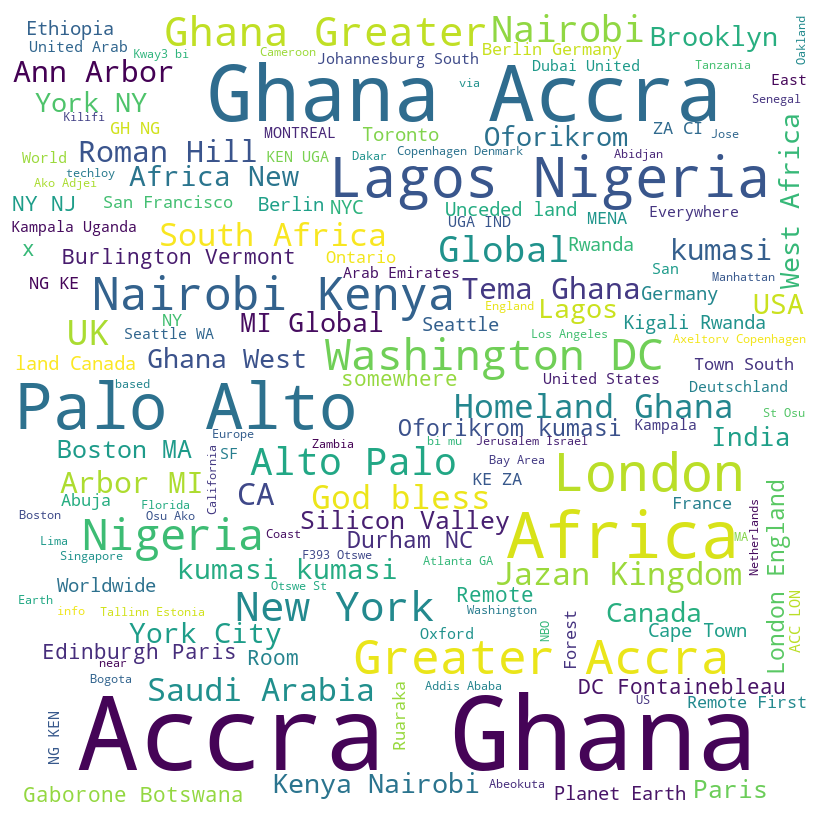

In [169]:
#visualise locations of tweets using wordcloud

# Combine the tokenised tweets into a single list
token_list = final_df['location_cleaned']

# Create a wordcloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10)

# Generate the wordcloud from the token list
wordcloud.generate(' '.join(token_list))

# Display the wordcloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)



year
2014      2
2015     19
2016     39
2017     53
2018     67
2019    278
2020    138
2021    487
2022    218
2023     18
Name: content, dtype: int64


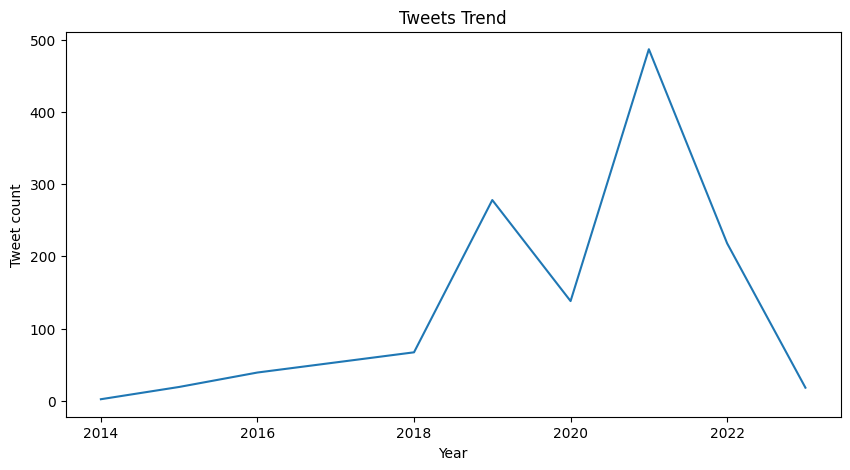

In [170]:
#Visualise tweets trends across the years
trend = final_df.groupby('year')['content'].count()
print(trend)
fig, ax = plt.subplots(figsize = (10,5))
trend.plot(ax=ax,xlabel= 'Year', ylabel = 'Tweet count', title = 'Tweets Trend');

SkollFoundation    53
aNiiOkantah        36
KojBenSon          32
AdomakoSupremo     29
LezekieO           23
Name: username, dtype: int64


Text(0.5, 0, 'Count of tweets')

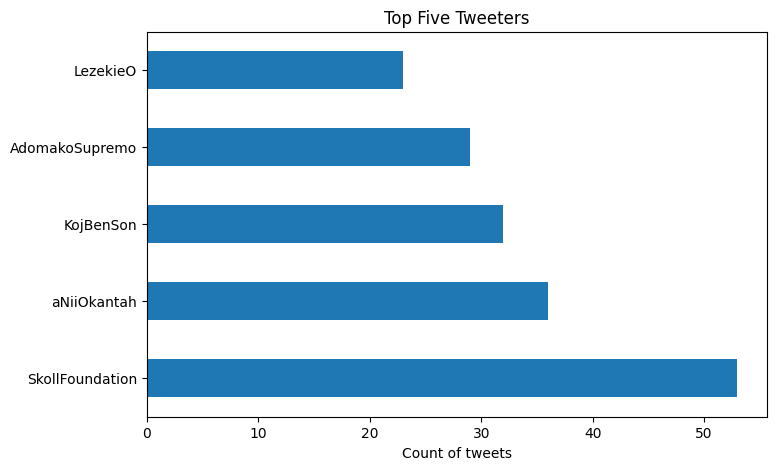

In [171]:
#visualise top 5 tweeters
top_tweeters = final_df['username'].value_counts().head().sort_values(ascending = False)
print(top_5)
top_tweeters.plot(kind = 'barh', title = 'Top Five Tweeters',figsize = (8,5));
plt.xlabel('Count of tweets')


In [172]:
#tokenise tweets into a new column 'tokens'
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')


# Define a function to tokenize tweets
def tokenize_tweet(tweet):
    # Tokenize the tweet using NLTK's word_tokenize function
    tokens = word_tokenize(tweet)
    return tokens

# Apply the tokenize_tweet function to the 'tweet' column of the dataframe
final_df['tokens'] = final_df['tweets'].apply(tokenize_tweet)

# Print the first 5 rows of the tokens column to verify that tokenization is successful
final_df['tokens'].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amhir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [mPharma, launches, mobile, POS, to, enhance, ...
1    [Medical, expenses, push, millions, into, pove...
2    [Pretty, excited, for, my, sister, shes, study...
3                    [Greetings, pls, support, for, a]
4    [Greetings, Mr, Tseke, Nkadimeng, amp, team, a...
Name: tokens, dtype: object

In [173]:
#Remove stop words

# Define the list of stopwords
stop_words = set(stopwords.words('english'))

#Remove stopwords from the tokens column and create a new column 'tokens_cleaned'
final_df['tokens_cleaned'] = final_df['tokens'].apply(lambda x: ' '.join
                                                      ([word for word in x if word.lower() not in stop_words]))


In [174]:
#verify if stopwords are removed

final_df['tokens_cleaned'].head()

0    mPharma launches mobile POS enhance retail ope...
1    Medical expenses push millions poverty Patient...
2    Pretty excited sister shes studying biological...
3                                Greetings pls support
4    Greetings Mr Tseke Nkadimeng amp team walking ...
Name: tokens_cleaned, dtype: object

### Polarity scores.
#### It is the sentiment expressed in the text of a tweet. Polarity can be positive, negative, or neutral, and is typically measured on a scale from -1 to 1, where -1 represents a very negative sentiment, 0 represents a neutral sentiment, and 1 represents a very positive sentiment.
#### We are going to extract the plarity scores to gauge public opinions on mPharmaHealth.

In [175]:
from textblob import TextBlob


# Create a column for polarity scores
final_df['polarity_score'] = final_df['tokens_cleaned'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Display the DataFrame with the new column
final_df.head(3)

,username,content,like_count,retweet_count,location,year,tweets,location_cleaned,tokens,tokens_cleaned,polarity_score
0,AppolonaAdeyemi,mPharma launches mobile POS to enhance retail ...,0,0,"""""",2023,mPharma launches mobile POS to enhance retail ...,"""""","[mPharma, launches, mobile, POS, to, enhance, ...",mPharma launches mobile POS enhance retail ope...,0.000000
1,DRF_India,Medical expenses push millions into poverty. P...,2,1,Hyderabad,2023,Medical expenses push millions into poverty Pa...,Hyderabad,"[Medical, expenses, push, millions, into, pove...",Medical expenses push millions poverty Patient...,0.000000
2,PaulDamalie,"Pretty excited for my sister , she's studying ...",1,0,ACC/ LON,2023,Pretty excited for my sister shes studying bi...,ACC/ LON,"[Pretty, excited, for, my, sister, shes, study...",Pretty excited sister shes studying biological...,0.333333


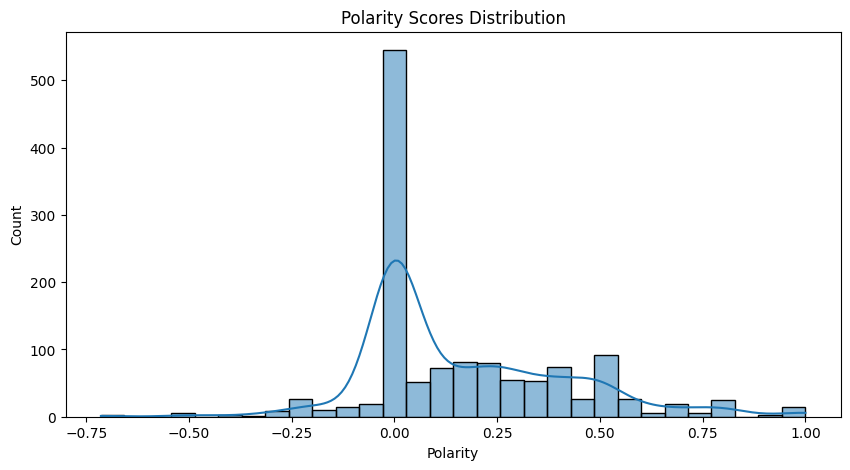

In [176]:
# Create a histogram to visualise polarity scores
plt.figure(figsize = (10,5))
sns.histplot(final_df, x='polarity_score', kde=True)
plt.title('Polarity Scores Distribution')
plt.xlabel('Polarity')
plt.ylabel('Count');


#### From histogram above, most of the scores are close to the mode. Opinions on this organisation are mainly neutral sentiments.

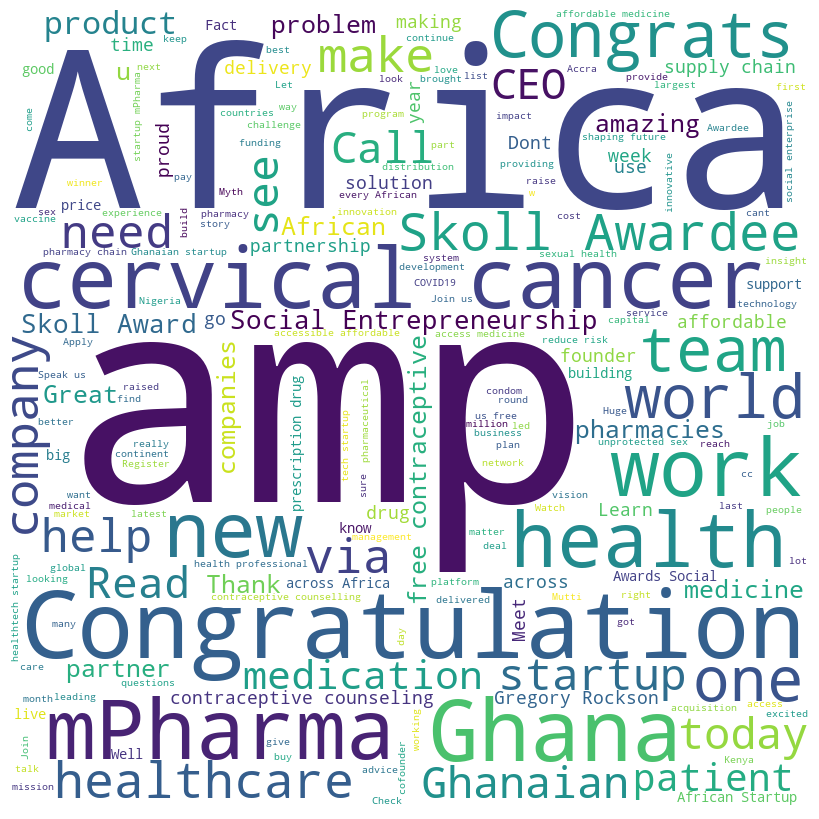

In [177]:
#visualise tweets to show the frequency of words in the tweets.

# Combine the tokenized tweets into a single list
token_list = final_df['tokens_cleaned']

# Create a wordcloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10)

# Generate the wordcloud from the token list
wordcloud.generate(' '.join(token_list))

# Display the wordcloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [178]:
#save cleaned data for future analysis
final_df.to_csv('mpharma_twitter_engagement_clean.csv', index = False)

#### CONCLUSION

Sentiment analysis is an inherently subjective task that relies on natural language processing techniques and algorithms, which can produce varying results depending on the data and methods used. Due to this, it is essential to interpret sentiment analysis results in context, as they may not necessarily reflect a subject's true sentiments.